# Mood - Body Event - Body Health

## Library

In [7]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
from shapely.geometry import LineString
import geopandas as gpd
from folium.plugins import PolyLineTextPath
import branca.colormap as cm
from datetime import datetime, timedelta

In [8]:
# Importamos el Activity_Event_
with open('data_sources/simulation/body_health/events/mood.json') as file:
    data = json.load(file)

## Event

Event date: December 29, 2023 at 08:00



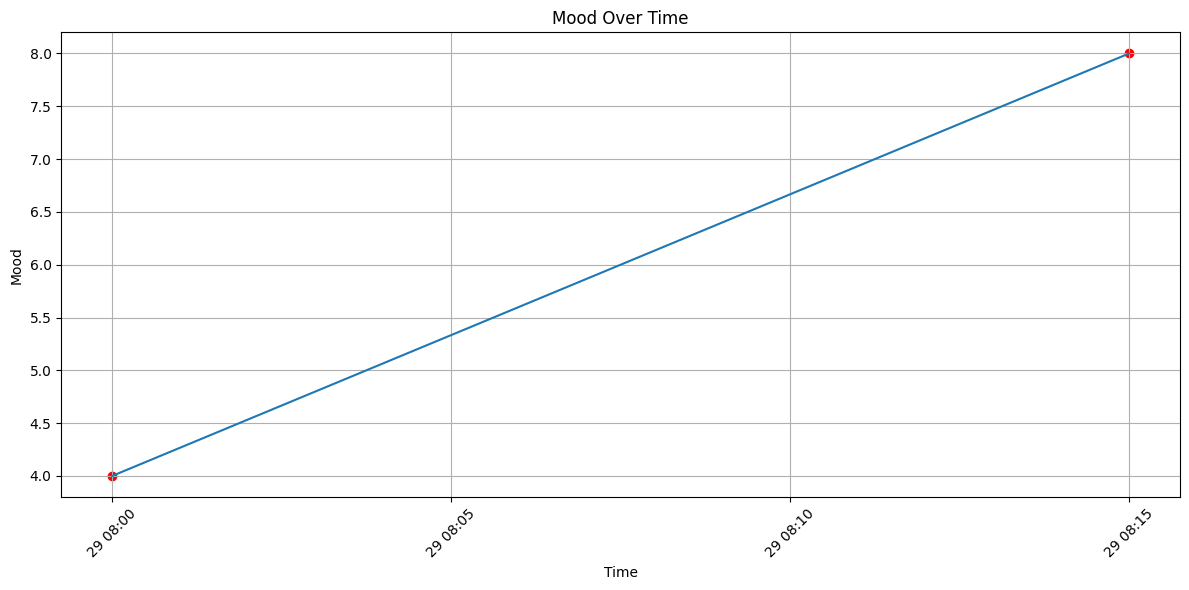

Heart Rate Average: 6.
Heart Rate Average: 6.
Heart Rate Minimus: 4.


In [12]:
mood_average = data['body_health']['events']['mood_event']['mood']['mood_avg_scale_int']
mood_maximum = data['body_health']['events']['mood_event']['mood']['mood_maximum_scale_int']
mood_minimum = data['body_health']['events']['mood_event']['mood']['mood_minimum_scale_int']
mood_granular = data['body_health']['events']['mood_event']['mood']['mood_granular_data_array']
original_date = data['body_health']['events']['mood_event']['metadata']['datetime_string']

def translate_date(date_str):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    dt = datetime.fromisoformat(date_str.replace("Z", "+00:00"))
    return f"{months[dt.month - 1]} {dt.day}, {dt.year} at {dt.hour:02d}:{dt.minute:02d}"
translated_date = translate_date(original_date)
print(f"Event date: {translated_date}\n")

# Prepare data for plotting
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in mood_granular]
mood = [item['mood_scale_int'] for item in mood_granular]

if mood_granular:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, mood, linestyle='-')
    plt.title('Mood Over Time')
    plt.xlabel('Time')
    plt.ylabel('Mood')
    plt.scatter(datetimes, mood, color='red', label='Data points') 
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Mood chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

# mood avg
if mood_average is None:
    mood_average_result = "Heart Rate Average: No values ​​were obtained or it is null."
else:
    mood_average_result = f'Heart Rate Average: {mood_average}.'

# Mood maximus
if mood_maximum is None:
    mood_maximum_result = "Heart Rate Maximus: No values ​​were obtained or it is null."
else:
    mood_maximum_result = f'Heart Rate Maximus: {mood_maximum}.'
    
# Mood minimus
if mood_minimum is None:
    mood_minimum_result = "Heart Rate Minimus: No values ​​were obtained or it is null."
else:
    mood_minimum_result = f'Heart Rate Minimus: {mood_minimum}.'

print(mood_average_result)
print(mood_average_result)
print(mood_minimum_result)